Problem 137: Details of positional information

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math as math 
from scipy.optimize import curve_fit

In [2]:
Hb = loadmat('/Users/adrianadropulic/Desktop/Biophysics/Hb.mat')['Hb']
#Hb(x,i)
#20 embryos i
#100 points x
#data are normalized so that the mean expression level at each position has a max value of g_bar = 1 and min value of g_bar = 0. 

In [3]:
data = np.ma.masked_invalid(Hb)

Text(0.5,0,'Anterior-posterior position (relative)')

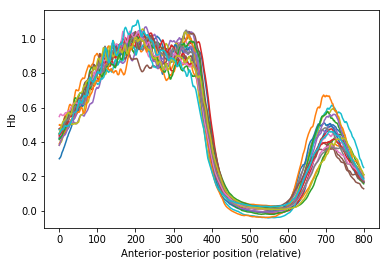

In [4]:
plt.plot(data[0:,100:900].T)
plt.ylabel('Hb')
plt.xlabel('Anterior-posterior position (relative)')

In [5]:
data_work = data[:,100:900]

Text(0.5,0,'Anterior-posterior position (relative)')

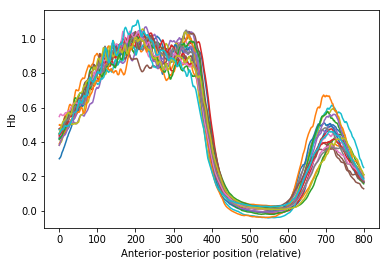

In [6]:
for embryo_i in range(0,20):
    plt.plot(data_work[embryo_i,:])
plt.ylabel('Hb')
plt.xlabel('Anterior-posterior position (relative)')

Making histogram with equal bin sizes first. 

In [7]:
def plot_distribution(N):
    data_allg = data_work[0:N,:].flatten()
    for hist_i in range(50,250,50):
        n, bins, patches = plt.hist(data_allg, bins=hist_i, range=(0,1), histtype='step', fill = True, label = 'g,  x bin size = '+ str(round(1/hist_i,3)), density = True)
        plt.xlabel('Mean expression level g')
        plt.ylabel('Number of sites on '+str(N)+' embryos')
        plt.legend()

##### Need to compute the entropy $S[P_{G}(g)]$ for each distribution with number of bins fixed, then see how this entropy depends on the number of embryos N that you include in the analysis. 

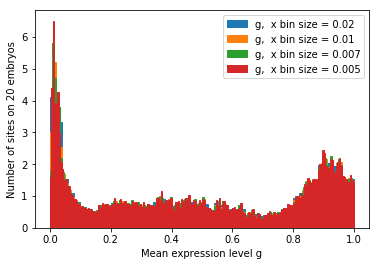

In [8]:
plot_distribution(20)

Going to make new function that only computes entropy of one distribution, going to choose x bin size = 0.007.

In [297]:
def find_entropy_const_bins(N,bin_num):
    nn_list = []
    for nn in range(N): nn_list.append(np.random.randint(1,20))
    data_allg = data_work[nn_list,:].flatten()
    n, bins = np.histogram(data_allg, bins=bin_num, range=(0,1), density = True)
    entropy = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
    return entropy

In [299]:
%%capture
entropy_list = []
entropy_list_err = []
N_list = []
for N_val in range(1,21):
    print(N_val)
    N_list.append(N_val)
    out_ent = [find_entropy_const_bins(N_val, 200) for _ in range(20)]
    entropy_list.append(np.mean(out_ent))
    entropy_list_err.append(np.std(out_ent))

In [300]:
N_inv = []
for i in range(0,len(N_list)):
    N_inv.append(1/N_list[i])

In [301]:
def entropy_fit(N,A,B,S):
    Sest = S+ (A/N) + (B/np.power(N,2))
    return Sest

In [302]:
popt_ent, pcov_ent = curve_fit(entropy_fit, N_list, entropy_list)


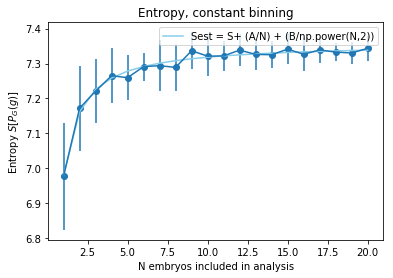

In [305]:
plt.figure()
plt.scatter(N_list,entropy_list)
plt.errorbar(N_list,entropy_list,yerr = entropy_list_err)
plt.plot(N_list,entropy_fit(N_list, popt_ent[0],popt_ent[1], popt_ent[2]),color = 'skyblue', label = 'Sest = S+ (A/N) + (B/np.power(N,2))')
plt.xlabel('N embryos included in analysis')
plt.ylabel('Entropy $S[P_{G}(g)]$')
plt.title('Entropy, constant binning')
plt.legend()

Now making histogram with varying bin size, so each bin contains the same number of samples. 

In [233]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1), #the space from 0 to num points in intervals of how many bins you wnat, are looking for the numbers associated with these points
                     np.arange(npt), #list of 1: number of data points 
                     np.sort(x)) # y coord of data points, in order 
#np.interp will just tell you what the y value is at each of the bin locations, this is how you get an equal number 
#of points in each bin, because you just use those y values at the bin locations as your edges
def find_entropy_variable_bins(N, bin_num):
    nn_list = []
    for nn in range(N): nn_list.append(np.random.randint(1,20))
    data_allg_var = data_work[nn_list,:].flatten()
    n, bins = np.histogram(data_allg_var, histedges_equalN(data_allg_var, bin_num), density = True)
    #for xc in range(len(bins)):
        #plt.axvline(bins[xc],color = 'white')
    #plt.xlabel('Mean expression level g, variable bin size, ' + str(bin_num)+' bins')
    #plt.ylabel('Number of sites on '+str(N)' embryos')
    entropy = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
    return entropy

In [307]:
%%capture
entropy_list_variable = []
entropy_list_variable_err = []
for N_val in range(1,21):
    print(N_val)
    out_ent_var = [find_entropy_variable_bins(N_val,200) for _ in range(20)]
    entropy_list_variable.append(np.mean(out_ent_var))
    entropy_list_variable_err.append(np.std(out_ent_var))

In [308]:
popt_ent_var, pcov_ent_var = curve_fit(entropy_fit, N_list, entropy_list_variable)


Text(0.5,1,'Entropy, variable binning')

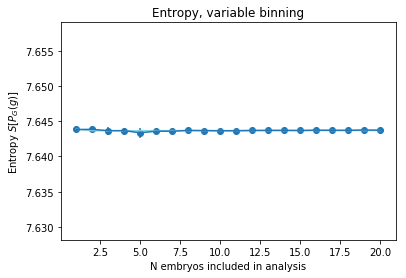

In [310]:
plt.figure()
plt.scatter(N_list,entropy_list_variable)
plt.errorbar(N_list,entropy_list_variable,yerr = entropy_list_variable_err)
plt.plot(N_list,entropy_fit(N_list, popt_ent_var[0],popt_ent_var[1], popt_ent_var[2]),color = 'skyblue', label = 'Sest = S+ (A/N) + (B/np.power(N,2))')
plt.xlabel('N embryos included in analysis')
plt.ylabel('Entropy $S[P_{G}(g)]$')
plt.title('Entropy, variable binning')

##### b) In part b, we epect that the varying size of bins will produce a change in entropy such that $S_{est} = S_{0} - log_{2}(\delta g)$. Can you see this change in the real data? 

In [240]:
scattercolors = ['orchid','aqua','orange','lightgreen','plum','paleturquoise','indianred','cornflowerblue','gold','yellowgreen']
linecolors = ['darkmagenta','blue','darkorange','green','violet','turquoise','firebrick','royalblue','goldenrod','darkolivegreen']
def plot_many_delta_x(N):
    plt.figure()
    i = -1
    for bin_num_i in range(100,1100,100):
        i = i +1;
        entropy_list_i = []
        for N_val in range(1,21):
            entropy_list_i.append(np.mean([find_entropy_const_bins(N_val, bin_num_i) for _ in range(5)]));
        popt_ent_i, pcov_ent_i = curve_fit(entropy_fit, N_list, entropy_list_i)
        plt.scatter(N_list,entropy_list_i,color = scattercolors[i])
        plt.plot(N_list,entropy_fit(N_list, popt_ent_i[0],popt_ent_i[1], popt_ent_i[2]),color= linecolors[i], label = 'dg = '+str(round(1/bin_num_i,4))+', S ='+ str(round(popt_ent_i[2],3))+'-> close to -log2(dg)='+str(round(-np.log2(1/bin_num_i),3))+', A = '+str(round(popt_ent_i[0],4))+ ', B = '+str(round(popt_ent_i[1],4)))
    plt.xlabel('N embryos included in analysis')
    plt.ylabel('Entropy $S[P_{G}(g)]$')
    plt.title('Entropy, constant binning, for different $\delta g$')
    plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))

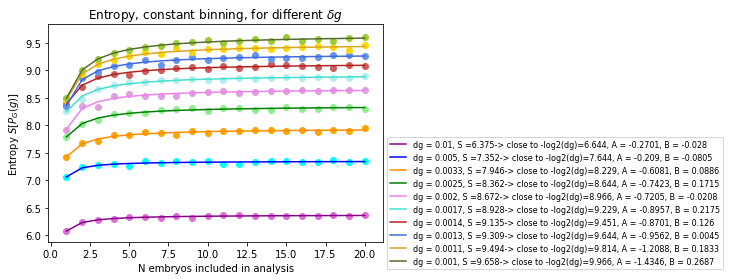

In [241]:
plot_many_delta_x(N_list)

This shows that as $\delta g$ decreases, the distribution is shifted upwards by a constant S, which as seen in the legend above, is approximately $-log_{2}(\delta g)$.

The corresponding behavior we expect to see with the adaptive bins is that the distributions are also shifted upwards as $\delta g$ decreases. 

/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


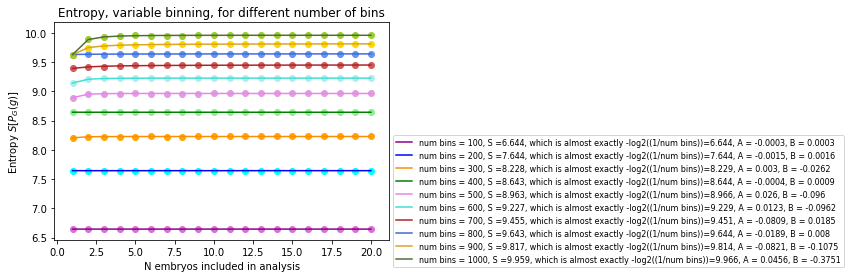

In [242]:
def plot_many_delta_x_var(N):
    plt.figure()
    i = -1
    for bin_num_i in range(100,1100,100):
        i = i +1;
        entropy_list_i = []
        for N_val in range(1,21):
            entropy_list_i.append(np.mean([find_entropy_variable_bins(N_val, bin_num_i) for _ in range(5)]));
        popt_ent_i, pcov_ent_i = curve_fit(entropy_fit, N_list, entropy_list_i)
        plt.scatter(N_list,entropy_list_i,color = scattercolors[i])
        plt.plot(N_list,entropy_fit(N_list, popt_ent_i[0],popt_ent_i[1], popt_ent_i[2]),color= linecolors[i], label = 'num bins = '+str(bin_num_i)+', S ='+ str(round(popt_ent_i[2],3))+', which is almost exactly -log2((1/num bins))='+str(round(-np.log2(1/bin_num_i),3))+', A = '+str(round(popt_ent_i[0],4))+ ', B = '+str(round(popt_ent_i[1],4))) 
    plt.xlabel('N embryos included in analysis')
    plt.ylabel('Entropy $S[P_{G}(g)]$')
    plt.title('Entropy, variable binning, for different number of bins')
    plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plot_many_delta_x_var(N_list)

As expected, the entropy increases as the total number of bins increases for variable $\delta g$. Also, the constant S (except for num bins = 1000, not sure why) is exactly -log2(1/num bins), where (1/num bins) = $\delta g$ in the case of constant binning. THIS IS BECAUSE....

##### c) If we have more bins, the sampling problem gets harder. The signature of this should be that the coefficients A and B become larger as $\delta g$ becomes smaller. (WHY does this show that?)

This can be seen in the legend of the plot above titled "Entropy, constant binning, for different $\delta g$." As $\delta g$ decreases, A becomes a larger negative number and B becomes a larger positive number. 

##### c) From Appendix A.8, do you have some analytic expectations for how this should work quantitatively? Are these expectations borne out in the data?

Probably has to do with equation A.444. Can see that A is proportional to -$\frac{K}{2 ln2}$, where K is the number of possibilities . As the number of possibilities, which can be thought of as an analog to the number of bins (i.e. more possible states for a point to fall into), increases, A becomes more negative as we see in the data. The next term of the taylor expansion is also...

##### d) With some fixed bin size $\delta g$, make estimates of the conditional distributions P(g|x) at each position x. Use these estimates to compute S[P(g|x)], and hence obtain an estimate of I(g;x).

In [52]:
#will need to go back to using data_work array, which has the position information. 
#so what we want to find is P(g) at each x. So, I could make separate plots for each with bin width dg.
#But, then how do you compute the entropy of that? I guess you'd need to do this for a specific value of N

In [287]:
def prob_at_each_x(N, bin_num):
    entropy_each_x = []
    x_coords = np.linspace(0,1,800) 
    for x_coord_i in range(0,800):
        nn_list = []
        for nn in range(N): nn_list.append(np.random.randint(1,20))
        data_at_x = data_work[nn_list,x_coord_i]
        n, bins = np.histogram(data_at_x, bins=bin_num, range=(0,1), density = True)
        entropy_at_x = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
        entropy_each_x.append(entropy_at_x)
    return np.mean(np.ma.masked_invalid(entropy_each_x))   
prob_at_each_x(5, 200)

1.805320982715915

In [311]:
conditional_entropy_list = []
conditional_entropy_list_err = []
for N_val in range(1,21):
    output = [prob_at_each_x(N_val, 200) for _ in range(20)]
    conditional_entropy_list.append(np.mean(output))
    conditional_entropy_list_err.append(np.std(output))

Text(0.5,1,'Conditional Entropy, $\\delta g$ = 0.005, for different number of embryos')

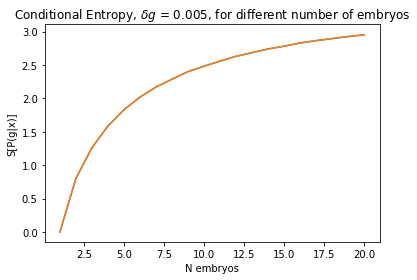

In [331]:
plt.plot(N_list, conditional_entropy_list)
plt.errorbar(N_list, conditional_entropy_list, yerr = conditional_entropy_list_err )
plt.ylabel('S[P(g|x)]')
plt.xlabel('N embryos')
plt.title('Conditional Entropy, $\delta g$ = 0.005, for different number of embryos')

In [313]:
I_gx = np.ma.masked_invalid(entropy_list) - np.ma.masked_invalid(conditional_entropy_list)

In [314]:
def info_fit(N,C,D,I):
    Iest = I+ (C/N) + (D/np.power(N,2))
    return Iest
popt_info, pcov_info = curve_fit(info_fit, N_list, I_gx)

In [369]:
print(pcov_info[2][1])

0.007934557405130252


/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


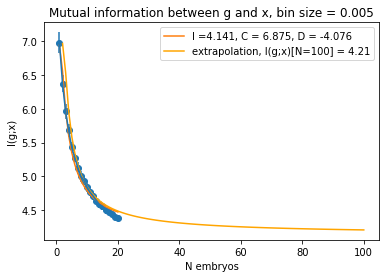

In [328]:
plt.scatter(N_list, I_gx)
plt.errorbar(N_list, I_gx, yerr = np.array(entropy_list_err)+np.array(conditional_entropy_list_err))
plt.plot(N_list,info_fit(N_list, popt_info[0],popt_info[1], popt_info[2]), label = 'I ='+ str(round(popt_info[2],3)) +', C = '+str(round(popt_info[0],3))+ ', D = '+str(round(popt_info[1],3)))
plt.plot(np.linspace(1,100,99),info_fit(np.linspace(0,100,99), popt_info[0],popt_info[1], popt_info[2]),color = 'orange', label = 'extrapolation, I(g;x)[N=100] = '+str(round(info_fit(np.linspace(1,100,99), popt_info[0],popt_info[1], popt_info[2])[97],3)))
plt.ylabel('I(g;x)')
plt.xlabel('N embryos')
plt.title('Mutual information between g and x, bin size = 0.005')
plt.legend(bbox_to_anchor=(1, 1))

According to the plot and fit above, $I_{est}(\delta g,N) = I_{\infty}(\delta g) + \frac{A'(\delta g)}{N} + \frac{B'(\delta g)}{N^{2}}$, where C and D are A' and B', respectively. A' and B' do have opposite signs from those of A and B.  WHY?

Real answer does not depend on arbitrary choice of bin size as $\delta g -> 0$. Can you recover this behavior by extrapolating to $I_{\infty}(\delta g)$? As can be seen in by the line labeled "extrapolation" in the figure above, the value of the mutual information at a large value of N is very close to the estimated $I_{\infty}(\delta g)$ given in the fit for bin size = .005 (I = 3.613). 

At fixed N, $I_{est}(\delta g,N)$ can have a strong dependence on $\delta g$ BECAUSE...

##### What happens in the case of adaptive bins?

In [271]:
def prob_at_each_x_var(N, bin_num):
    entropy_each_x = []
    x_coords = np.linspace(0,1,800) 
    for x_coord_i in range(0,800):
        nn_list = []
        for nn in range(N): nn_list.append(np.random.randint(1,20))
        data_at_x = data_work[nn_list,x_coord_i]
        n, bins = np.histogram(data_at_x, histedges_equalN(data_at_x, bin_num), density = True)
        entropy_at_x = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
        entropy_each_x.append(entropy_at_x)
        
    #plt.scatter(x_coords, entropy_each_x, label = str(N)+' embryos, dg = '+str(round(1/bin_num,4)))
    #plt.xlabel('Anterior-posterior position (relative)')
    #plt.ylabel('S[P(g|x)]')
    #plt.title('Conditional Entropy at each x position, variable bins')
    #plt.legend(bbox_to_anchor=(1, 1))
    return np.mean(np.ma.masked_invalid(entropy_each_x))   

In [316]:
conditional_entropy_list_var = []
conditional_entropy_list_var_err = []
for N_val in range(1,21):
    output_var = [prob_at_each_x_var(N_val, 200) for _ in range(20)]
    conditional_entropy_list_var.append(np.mean(output_var))
    conditional_entropy_list_var_err.append(np.std(output_var))

/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Text(0.5,1,'Conditional Entropy, variable bin size, for different number of embryos')

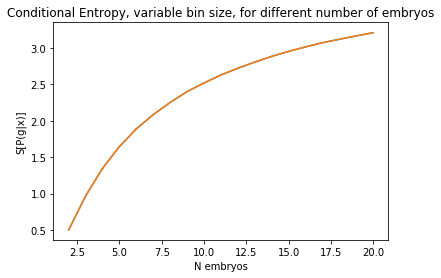

In [332]:
plt.plot(N_list, conditional_entropy_list_var)
plt.errorbar(N_list, conditional_entropy_list_var, yerr = conditional_entropy_list_var_err )
plt.ylabel('S[P(g|x)]')
plt.xlabel('N embryos')
plt.title('Conditional Entropy, variable bin size, for different number of embryos')

In [319]:
I_gx_var = np.ma.masked_invalid(entropy_list_variable) - np.ma.masked_invalid(conditional_entropy_list_var)
popt_info_var, pcov_info_var = curve_fit(info_fit, N_list, I_gx_var)

/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


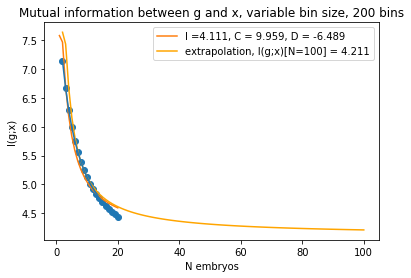

In [327]:
plt.scatter(N_list, I_gx_var)
plt.errorbar(N_list, I_gx_var, yerr = np.array(entropy_list_variable_err)+np.array(conditional_entropy_list_var_err))
plt.plot(N_list,info_fit(N_list, popt_info_var[0],popt_info_var[1], popt_info_var[2]), label = 'I ='+ str(round(popt_info_var[2],3)) +', C = '+str(round(popt_info_var[0],3))+ ', D = '+str(round(popt_info_var[1],3)))
plt.plot(np.linspace(1,100,99),info_fit(np.linspace(0,100,99), popt_info_var[0],popt_info_var[1], popt_info_var[2]),color = 'orange', label = 'extrapolation, I(g;x)[N=100] = '+str(round(info_fit(np.linspace(1,100,99), popt_info_var[0],popt_info_var[1], popt_info_var[2])[97],3)))
plt.ylabel('I(g;x)')
plt.xlabel('N embryos')
plt.title('Mutual information between g and x, variable bin size, 200 bins')
plt.legend(bbox_to_anchor=(1, 1))

Mutual information is the reduction in uncertainty of about g after observing x. Your uncertainty, which is proportional to S[PG(g)], is reduced by the average uncertainty about g after observing a second random variable x (S[P(g|x)]) . Mutual information can also be thought of as the expected reduction in the number of yes/no questions needed to guess g after observing x. So in this plot, the mutual information on the y axis is the reduction in uncertainty about g after observing x for a given N. In other words, it is the expected reduction in the number of yes/no questions needed to guess g after observing x. As you have more samples N, you will need more yes/no questions to guess g after observing x. A' and B' are much larger because this reduction in uncertainty is much steeper (but with opposite sign) than the increase in S[PG(g)], due to the larger increase of S[P(g|x)] with N. S[P(g|x)] increases with N because the average uncertainty in g after observing x is much higher when dealing with more samples. 

SAY what happens in case of adaptive binning...

For part e, can use monte carlo simulation to assign errorbars to the extrapolated $I_{\infty}(\delta g)$ (as in figure A.14). Or could assign an overall error to $I_{\infty}$, which could be interpreted as the sqrt of the variance of the parameter $I_{\infty}$ given by the curve fit. In the case of constant binning, that value is: 0.08907. In the case of adaptive binning, that value is 0.1522. 

In [373]:
perr = np.sqrt(pcov_info[2][1]) 
print(perr)
perr_var = np.sqrt(pcov_info_var[2][1])
print(perr_var)

0.08907613263456296
0.15226498065977262


In [436]:
def plot_I_diff_delta_x(N):
    plt.figure()
    i = -1
    I_gx_dx = []
    delta_x_arr = []
    for bin_num_i in range(1,10000,100):
        i = i +1;
        entropy_i = np.mean([find_entropy_const_bins(N, bin_num_i) for _ in range(5)]);
        conditional_entropy_i = np.mean([prob_at_each_x(N, bin_num_i) for _ in range(5)]);
        I_gx_i = np.ma.masked_invalid(entropy_i) - np.ma.masked_invalid(conditional_entropy_i)
        I_gx_dx.append(I_gx_i)
        delta_x_arr.append(round(1/bin_num_i,4))
    return delta_x_arr, I_gx_dx 

In [437]:
x_diffdx, y_diffdx = plot_I_diff_delta_x(20)

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Mutual Information for 20 embryos')

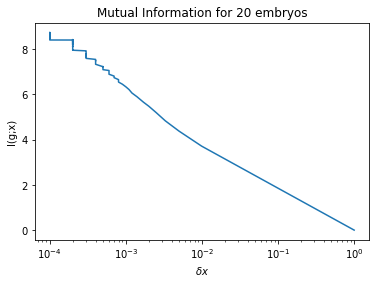

In [438]:
plt.plot(x_diffdx,y_diffdx)
plt.xlabel('$\delta x$')
plt.ylabel('I(g;x)')
plt.xscale('log')
plt.title('Mutual Information for 20 embryos')

##### Suppose that instead of sampling the P(g|x), we approximate it as gaussian. Use this approximation to compute S[P(g|x)] and estimate S[PG(g)]. 

In [376]:
#so I'm going to need to input the variance of the P(x) at each g into S = 1/2log2[2 pi e var] and then I guess take the
#mean of that 
def prob_at_each_x_gauss(N, bin_num):
    entropy_each_x = []
    x_coords = np.linspace(0,1,800) 
    for x_coord_i in range(0,800):
        nn_list = []
        for nn in range(N): nn_list.append(np.random.randint(1,20))
        data_at_x = data_work[nn_list,x_coord_i]
        variance = np.var(data_at_x)
        entropy_at_x = (1/2)*np.log2(2 * np.pi * np.exp(1) *variance)
        entropy_each_x.append(entropy_at_x)
    return np.mean(np.ma.masked_invalid(entropy_each_x))   

In [377]:
prob_at_each_x_gauss(20,200)

-2.5939425875371898

In [378]:
cond_ent_gaus = []
cond_ent_gaus_err = []
for N_val in range(1,21):
    output_gaus = [prob_at_each_x_gauss(N_val, 200) for _ in range(20)]
    cond_ent_gaus.append(np.mean(output_gaus))
    cond_ent_gaus_err.append(np.std(output_gaus))

/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'Conditional Entropy, constant binning, for different number of embryos')

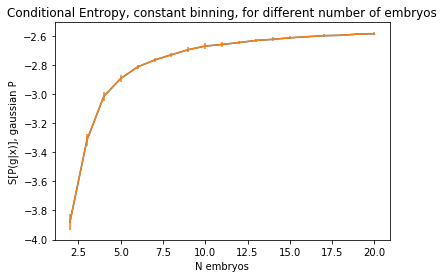

In [379]:
plt.plot(N_list, cond_ent_gaus)
plt.errorbar(N_list, cond_ent_gaus, yerr = cond_ent_gaus_err )
plt.ylabel('S[P(g|x)], gaussian P')
plt.xlabel('N embryos')
plt.title('Conditional Entropy, constant binning, for different number of embryos')

In [380]:
I_gx_gaus = np.ma.masked_invalid(entropy_list) - np.ma.masked_invalid(cond_ent_gaus)
popt_info_gaus, pcov_info_gaus = curve_fit(info_fit, N_list, I_gx_gaus)

No handles with labels found to put in legend.


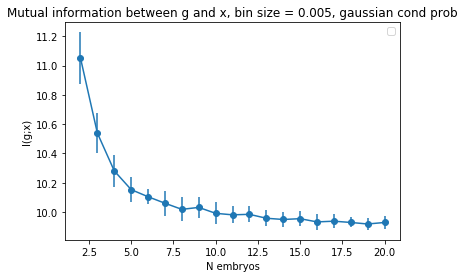

In [385]:
plt.scatter(N_list, I_gx_gaus)
plt.errorbar(N_list, I_gx_gaus, yerr = np.array(entropy_list_err)+np.array(cond_ent_gaus_err))
#plt.plot(N_list,info_fit(N_list, popt_info_gaus[0],popt_info_gaus[1], popt_info_gaus[2]), label = 'I ='+ str(round(popt_info_gaus[2],3)) +', C = '+str(round(popt_info_gaus[0],3))+ ', D = '+str(round(popt_info_gaus[1],3)))
#plt.plot(np.linspace(1,100,99),info_fit(np.linspace(0,100,99), popt_info_gaus[0],popt_info_gaus[1], popt_info_gaus[2]),color = 'orange', label = 'extrapolation, I(g;x)[N=100] = '+str(round(info_fit(np.linspace(1,100,99), popt_info_gaus[0],popt_info_gaus[1], popt_info_gaus[2])[97],3)))
plt.ylabel('I(g;x)')
plt.xlabel('N embryos')
plt.title('Mutual information between g and x, bin size = 0.005, gaussian cond prob')
plt.legend(bbox_to_anchor=(1, 1))

When the conditional probability distribution is considered to be Gaussian, the mutual information is much higher as compared to the more direct approach to calculating the entropy. This is because in this approach the bin size becomes infinitely small. This can be seen when comparing to the plot above entitled " Mutual information for 20 embryos". It can be seen that as the bin size becomes very small, for 20 embryos, the mutual information reaches a value of about 9.5. This is the same value that the mutual information reached for 20 embryos (gaussian conditional probability) in the plot above this paragraph. 

##### g) Suppose we randomize the data, replacing the position x by a random permutation of the number from 1 to L, chosen independently for each embryo. Now there should be no mutual information, but if we estimate $I_{rand}(g;x)$ by any naive method, the answer will be nonzero because of spurious correlations in our finite sample. Show that, so long as we do not have too many bins along the g axis, the extrapolation to $I_{\infty}(\Delta g)$ from the fit is zero within error bars for randomized data.

In [455]:
data_work_shuffled = np.ones_like(data_work)
print(np.shape(data_work_shuffled ))

(20, 800)


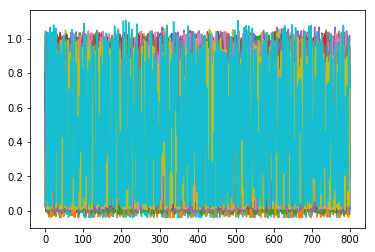

In [457]:
for embryo_i in range(0,20):
    data_work_shuffled[embryo_i,:] = np.random.permutation(data_work[embryo_i,:])
    plt.plot(data_work_shuffled[embryo_i,:])

In [458]:
def find_entropy_const_bins_shuffled(N,bin_num):
    nn_list = []
    for nn in range(N): nn_list.append(np.random.randint(1,20))
    data_allg = data_work_shuffled[nn_list,:].flatten()
    n, bins = np.histogram(data_allg, bins=bin_num, range=(0,1), density = True)
    entropy = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
    return entropy

In [459]:
%%capture
entropy_list_shuffled = []
entropy_list_shuffled_err = []
N_list = []
for N_val in range(1,21):
    print(N_val)
    N_list.append(N_val)
    out_ent_shuf = [find_entropy_const_bins_shuffled(N_val, 50) for _ in range(20)]
    entropy_list_shuffled.append(np.mean(out_ent_shuf))
    entropy_list_shuffled_err.append(np.std(out_ent_shuf))

Text(0.5,1,'Entropy, constant binning, shuffled x')

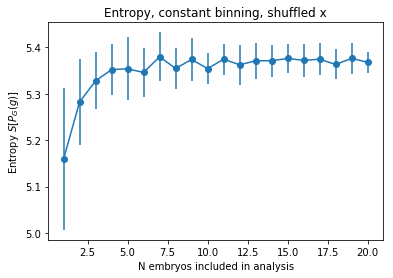

In [460]:
plt.figure()
plt.scatter(N_list,entropy_list_shuffled)
plt.errorbar(N_list,entropy_list_shuffled,yerr = entropy_list_shuffled_err)
#plt.plot(N_list,entropy_fit(N_list, popt_ent_var[0],popt_ent_var[1], popt_ent_var[2]),color = 'skyblue', label = 'Sest = S+ (A/N) + (B/np.power(N,2))')
plt.xlabel('N embryos included in analysis')
plt.ylabel('Entropy $S[P_{G}(g)]$')
plt.title('Entropy, constant binning, shuffled x')

In [461]:
def prob_at_each_x_shuffled(N, bin_num):
    entropy_each_x = []
    x_coords = np.linspace(0,1,800) 
    for x_coord_i in range(0,800):
        nn_list = []
        for nn in range(N): nn_list.append(np.random.randint(1,20))
        data_at_x = data_work_shuffled[nn_list,x_coord_i]
        n, bins = np.histogram(data_at_x, bins=bin_num, range=(0,1), density = True)
        entropy_at_x = -np.ma.sum(n*np.diff(bins)*np.ma.log2(n*np.diff(bins)))
        entropy_each_x.append(entropy_at_x)
    return np.mean(np.ma.masked_invalid(entropy_each_x)) 

In [462]:
cond_ent_shuffled = []
cond_ent_shuffled_err = []
for N_val in range(1,21):
    output_shuffled = [prob_at_each_x_shuffled(N_val, 50) for _ in range(20)]
    cond_ent_shuffled.append(np.mean(output_shuffled))
    cond_ent_shuffled_err.append(np.std(output_shuffled))

Text(0.5,1,'Conditional Entropy, $\\delta g$ = 0.02, shuffled x')

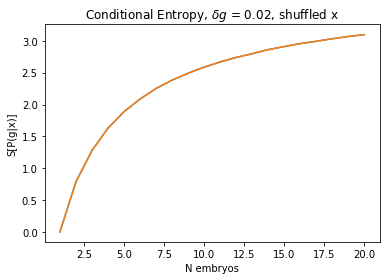

In [463]:
plt.plot(N_list, cond_ent_shuffled)
plt.errorbar(N_list, cond_ent_shuffled, yerr = cond_ent_shuffled_err )
plt.ylabel('S[P(g|x)]')
plt.xlabel('N embryos')
plt.title('Conditional Entropy, $\delta g$ = 0.02, shuffled x')

In [464]:
I_gx_shuffled = np.ma.masked_invalid(entropy_list_shuffled) - np.ma.masked_invalid(cond_ent_shuffled)
popt_info_shuf, pcov_info_shuf = curve_fit(info_fit, N_list, I_gx_shuffled)

/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/adrianadropulic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


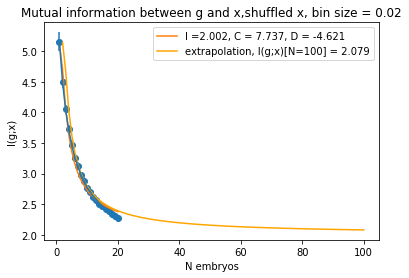

In [465]:
plt.scatter(N_list, I_gx_shuffled)
plt.errorbar(N_list, I_gx_shuffled, yerr = np.array(entropy_list_shuffled_err)+np.array(cond_ent_shuffled_err))
plt.plot(N_list,info_fit(N_list, popt_info_shuf[0],popt_info_shuf[1], popt_info_shuf[2]), label = 'I ='+ str(round(popt_info_shuf[2],3)) +', C = '+str(round(popt_info_shuf[0],3))+ ', D = '+str(round(popt_info_shuf[1],3)))
plt.plot(np.linspace(1,100,99),info_fit(np.linspace(0,100,99), popt_info_shuf[0],popt_info_shuf[1], popt_info_shuf[2]),color = 'orange', label = 'extrapolation, I(g;x)[N=100] = '+str(round(info_fit(np.linspace(1,100,99), popt_info_shuf[0],popt_info_shuf[1], popt_info_shuf[2])[97],3)))
plt.ylabel('I(g;x)')
plt.xlabel('N embryos')
plt.title('Mutual information between g and x,shuffled x, bin size = 0.02')
plt.legend(bbox_to_anchor=(1, 1))

In [466]:
def plot_I_diff_delta_x_shuffled(N):
    plt.figure()
    i = -1
    I_gx_dx = []
    delta_x_arr = []
    for bin_num_i in range(1,10000,100):
        i = i +1;
        entropy_i = np.mean([find_entropy_const_bins_shuffled(N, bin_num_i) for _ in range(5)]);
        conditional_entropy_i = np.mean([prob_at_each_x_shuffled(N, bin_num_i) for _ in range(5)]);
        I_gx_i = np.ma.masked_invalid(entropy_i) - np.ma.masked_invalid(conditional_entropy_i)
        I_gx_dx.append(I_gx_i)
        delta_x_arr.append(round(1/bin_num_i,4))
    return delta_x_arr, I_gx_dx 

Text(0.5,1,'Mutual Information for 20 embryos, shuffled x')

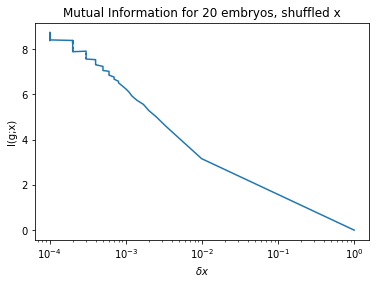

In [467]:
x_diffdx_shuf, y_diffdx_shuf = plot_I_diff_delta_x_shuffled(20)
plt.plot(x_diffdx_shuf,y_diffdx_shuf)
plt.xlabel('$\delta x$')
plt.ylabel('I(g;x)')
plt.xscale('log')
plt.title('Mutual Information for 20 embryos, shuffled x')